In [115]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

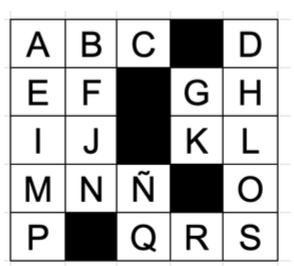

In [116]:
# We model the graph as a dictionary

graph = {
    'A': ['B', 'E'],
    'B': ['A', 'C', 'F'],
    'C':['B'],
    'D':['H'],
    'E':['A', 'F', 'I'],
    'F': ['B', 'E', 'J'],
    'G':['H', 'K'],
    'H':['D', 'G', 'L'],
    'I':['E', 'J', 'M'],
    'J':['F', 'I', 'N'],
    'K':['G', 'L'],
    'L':['H', 'K', 'O'],
    'M':['I', 'N', 'P'],
    'N':['J', 'M','Ñ'],
    'Ñ':['N', 'Q'],
    'O':['L', 'S'],
    'P':['M'],
    'Q':['Ñ','R'],
    'R':['Q','S'],
    'S':['O','R']
}

In [117]:
# Ask for user input for the initial and goal nodes
intial_node, goal_node = [input('Enter the initial node: ').upper(), input('Enter the goal node: ').upper()]

In [118]:
def dfs(grafo: dict[str,list[str]], inicio: str, objetivo: str, visitados: set = None, camino=None, caminos_encontrados: list =None, nivel:int = 0, verbose: bool = False):
    nivel += 1
    if verbose:
        print("\nNivel de profundidad:", nivel)
    
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = list()
    if caminos_encontrados is None:
        caminos_encontrados = list()

    camino.append(inicio)
    visitados.add(inicio)

    if verbose:
        print("\nNodo actual:", inicio, "\nNodos visitados", visitados, "\nCamino Actual:", camino, "\nIteraciones:", nivel)
   

    if inicio == objetivo:
        if verbose:
            print("Camino encontrado:", ' -> '.join(camino))
        caminos_encontrados.append(list(camino))
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                dfs(grafo, vecino, objetivo, visitados, camino, caminos_encontrados, nivel, verbose)

    camino.pop()

    
    return caminos_encontrados


In [119]:
def bfs(grafo: dict[str,list[str]], inicio: str, objetivo: str, verbose: bool=False):
    visitados = set()
    cola = deque([(inicio, [inicio])])
    caminos = list()

    iteracion = 1
    while cola:
        nodo_actual, camino = cola.popleft()
        if verbose:
            print("\nIteración:", iteracion, "\nCamino actual:", camino, "\nNodo actual:", nodo_actual)

        if nodo_actual == objetivo:
            caminos.append(camino)

        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            if verbose:
                print("Nodos visitados", visitados)
                

            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    if verbose:
                        print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        iteracion += 1


    return caminos

In [120]:
# DFS
print("\nDFS")

dfs_routes =  dfs(graph, intial_node, goal_node, verbose=True)
print("\nTodos los caminos encontrados:", [' -> '.join(camino) for camino in dfs_routes])

# BFS
print("\nBFS")
bfs_routes = bfs(graph, intial_node, goal_node, verbose=True)
print("\nTodos los caminos encontrados:", [' -> '.join(camino) for camino in bfs_routes])




DFS

Nivel de profundidad: 1

Nodo actual: A 
Nodos visitados {'A'} 
Camino Actual: ['A'] 
Iteraciones: 1

Nivel de profundidad: 2

Nodo actual: B 
Nodos visitados {'A', 'B'} 
Camino Actual: ['A', 'B'] 
Iteraciones: 2

Nivel de profundidad: 3

Nodo actual: C 
Nodos visitados {'C', 'A', 'B'} 
Camino Actual: ['A', 'B', 'C'] 
Iteraciones: 3

Nivel de profundidad: 3

Nodo actual: F 
Nodos visitados {'C', 'A', 'F', 'B'} 
Camino Actual: ['A', 'B', 'F'] 
Iteraciones: 3

Nivel de profundidad: 4

Nodo actual: E 
Nodos visitados {'C', 'E', 'A', 'B', 'F'} 
Camino Actual: ['A', 'B', 'F', 'E'] 
Iteraciones: 4

Nivel de profundidad: 5

Nodo actual: I 
Nodos visitados {'C', 'E', 'I', 'A', 'B', 'F'} 
Camino Actual: ['A', 'B', 'F', 'E', 'I'] 
Iteraciones: 5

Nivel de profundidad: 6

Nodo actual: J 
Nodos visitados {'C', 'E', 'I', 'A', 'B', 'J', 'F'} 
Camino Actual: ['A', 'B', 'F', 'E', 'I', 'J'] 
Iteraciones: 6

Nivel de profundidad: 7

Nodo actual: N 
Nodos visitados {'N', 'C', 'E', 'I', 'A', 'B', 'J

In [121]:
def plot_graph(algorithm: str, routes: list, graph: dict[str, list[str]], initial_node: str, goal_node: str):

    # Obtener la ruta más corta dentro de las rutas encontradas
    shortest_route = min(routes, key=len)


    G = nx.Graph(graph)

    # Asignar posiciones a los nodos
    pos = {'A': (1, 4), 'B': (2, 4), 'C': (3, 4), 'D': (4, 4), 'E': (1, 3),
           'F': (2, 3), 'G': (3, 3), 'H': (4, 3), 'I': (1, 2), 'J': (2, 2),
           'K': (3, 2), 'L': (4, 2), 'M': (1, 1), 'N': (2, 1), 'Ñ': (3, 1),
           'O': (4, 1), 'P': (1, 0), 'Q': (2, 0), 'R': (3, 0), 'S': (4, 0)}
    
    node_colors = ['red' if node in shortest_route else 'skyblue' for node in G.nodes()]

    # Dibujar el grafo
    nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, edge_color='k')

    # Dibujar la cuadrícula
    plt.grid(True)
    plt.xticks(range(0, 5))
    plt.yticks(range(0, 5))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f'Ruta encontrada por el algoritmo {algorithm}')
    plt.show()


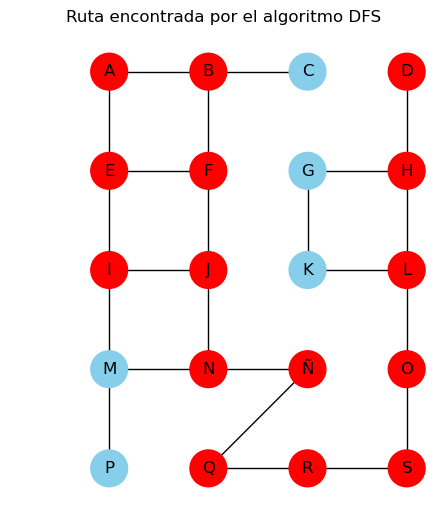

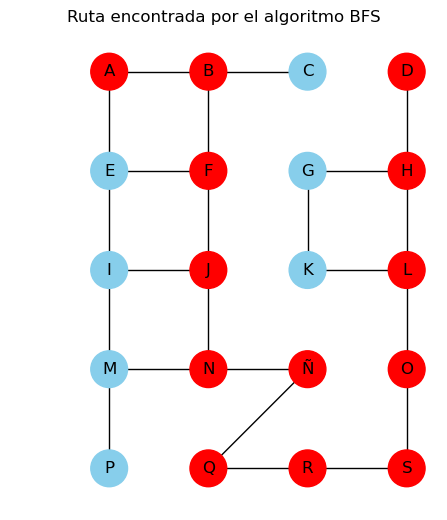

In [123]:

# Plot the graph
plot_graph('DFS', dfs_routes, graph, intial_node, goal_node)
plot_graph('BFS', bfs_routes, graph, intial_node, goal_node)

# Conclusión

Si bien, ambos algoritmos llegan a la misma solución, el algoritmo de profundidad en este caso obtiene una caminos más cortos, pero con mayor número de iteraciones que el algoritmo de amplitud. No obstante, el algoritmo de amplitud es más eficiente en términos de tiempo y espacio, ya que no necesita recorrer todos los nodos del árbol de búsqueda.